### Repro score
We introduced new notions of reproducibility, different from the classical hash comparison of the whole file tree.
The first one is to compare only binary files, here binary refer to any non human-readable files such as images, elf files, archives. The second notion is the comparison of elf files only. Lastly we also compute a repro score, which is defined as the number of non-reproducible files over all files.
Here we will analyse and see how relevant those notions are.

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import json
import os
import helpers
import subprocess

To better understand if these scores are relvant we will find a batch of programs which are both on flatpak and arch linux, and see if bad repro score == non-reproducible even on arch.

In [2]:
res = helpers.find_pacman_name('RedNotebook')

rednotebook	


In [3]:
cmd = ['flatpak', 'remote-ls', 'flathub', '--system', '--app', '--columns=application']
result = subprocess.run(cmd, capture_output=True)
output = result.stdout.decode('UTF-8')
on_flathub_and_arch = list()
for name in output.split('\n')[:-1]:
    arch_name = helpers.find_pacman_name(name.split('.')[-1])
    if arch_name:
        on_flathub_and_arch.append((name, arch_name))

rednotebook	
dconf-editor	
asunder	
manuskript	
playitslowly	
abiword	
calibre	
grafx2	
discord	
dosbox	
frogatto	
pinta	
scantailor-advanced	
bless	
dice	
bookworm	
barrier	
marker	
rnote	
copyq	
curtail	
pdfarranger	
foliate	
pdfslicer	
drawing	
songrec	
torbrowser-launcher	
pdftricks	
vocal	
minder	
notes-up	
spice-up	
ciano	
rssguard	
jadx	
easyeffects	
xournalpp	
clamtk	
newsflash	
tipp10	
cherrytree	
nextcloud	
nitrokey-app	
notepadqq	
john	
vidcutter	
polyphone	
blanket	
rawtherapee	
rosegarden	
sigil	
caprine	
snes9x	
springlobby	
sweethome3d	
teeworlds	
cura	
peek	
steam	
astromenace	
code	
zettlr	
fragments	
klayout	
boinc	
scratch	
pdfmixtool	
homebank	
pidgin	
bibletime	
mumble	
smplayer	
atom	
cockatrice	
hexchat	
opentoonz	
qalculate-qt	
celluloid	
xca	
cmus	
gpscorrelate	
ponysay	
goxel	
flowblade	
diffuse	
muse	
qnapi	
qtox	
quodlibet	
kooha	
ghostwriter	
lmms	
mpv	
openrct2	
gaupol	
nfoview	
photoflare	
paper	
qtcreator	
obsidian	
retext	
glide	
displaycal	
converseen	

In [4]:
print(len(on_flathub_and_arch))

393


In [6]:
stats = helpers.extract_stats('../results/accuray_of_repro_score/')

In [7]:
on_flathub_and_arch_dict = dict(on_flathub_and_arch)
good_on_arch = list()
bad_on_arch = list()
for stat in stats:
    arch_stat = on_flathub_and_arch_dict.get(stat['name'])
    if arch_stat and stat['build_sucess']:
        if arch_stat[0]['status'] == 'GOOD':
            good_on_arch.append(stat['repro_score'])
        else:
            bad_on_arch.append(stat['repro_score'])

In [8]:
print(len(good_on_arch) + len(bad_on_arch))
print(len(good_on_arch))
print(len(bad_on_arch))

283
253
30


<IPython.core.display.Javascript object>


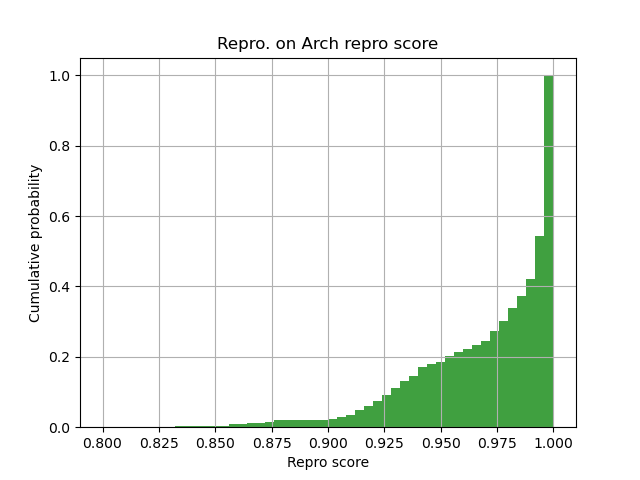

In [9]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(good_on_arch, 50, density=True, facecolor='g', alpha=0.75, cumulative=True, range=(0.8,1))
plt.xlabel('Repro score')
plt.ylabel('Cumulative probability')
plt.title('Repro. on Arch repro score')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


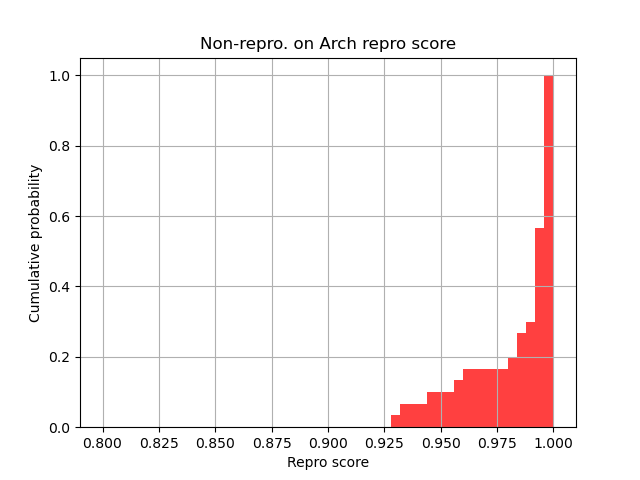

In [10]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(bad_on_arch, 50, density=True, facecolor='r', alpha=0.75, cumulative=True, range=(0.8,1))
plt.xlabel('Repro score')
plt.ylabel('Cumulative probability')
plt.title('Non-repro. on Arch repro score')
plt.grid(True)
plt.show()

In [11]:
n_good_arch = len(good_on_arch)
n_bad_arch = len(bad_on_arch)

In [12]:
elf_good_arch_good = 0
elf_good_arch_bad = 0
elf_bad_arch_good = 0
elf_bad_arch_bad = 0
for stat in stats:
    arch_stat = on_flathub_and_arch_dict.get(stat['name'])
    if arch_stat and stat['build_sucess']:
        arch_good = arch_stat[0]['status'] == 'GOOD'
        elf_good = stat['is_elf_reproducible']
        if arch_good and elf_good:
            elf_good_arch_good += 1
        if not arch_good and elf_good:
            elf_good_arch_bad += 1
        if arch_good and not elf_good:
            elf_bad_arch_good += 1
        if not arch_good and not elf_good:
            elf_bad_arch_bad += 1

<IPython.core.display.Javascript object>


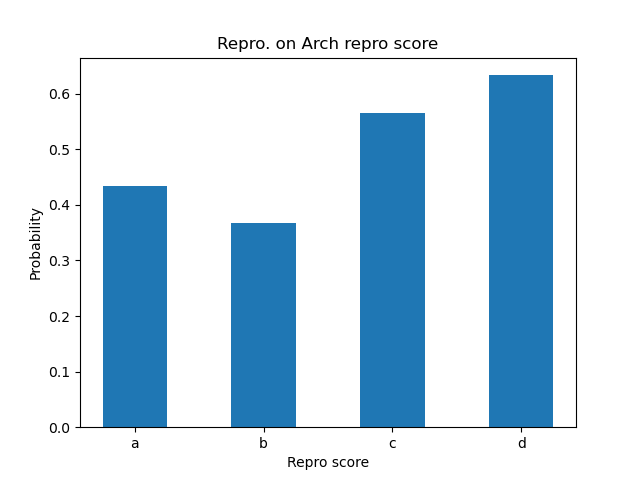

In [13]:
fig, ax = plt.subplots()
ax.bar(['a', 'b', 'c', 'd'], [elf_good_arch_good/n_good_arch, elf_good_arch_bad/n_bad_arch, elf_bad_arch_good/n_good_arch, elf_bad_arch_bad/n_bad_arch], width=0.5)
plt.xlabel('Repro score')
plt.ylabel('Probability')
plt.title('Repro. on Arch repro score')
plt.show()